# Problem Statement

The Black friday purchasing information is beign used by a retail comapany named "XYZ Private Limited" to better understand how customers act when making purchases ( we need to know how much they spend and what are factors behind this trends) for various goods belonging. They provided a summary of the purchases made by serval clients last month for a new high volume products. The features are following ( Age , Gender , Marital Status, City Type,Stay in Current City, Product ID, Product Categories[1,2,3] and Purchase Amount). The business owners would benefit greatly from such a predictor as they will understand on which factors they should focus more to increase the sales or the purchase rate of the customer. The data set is downloaded from kaggle.<br>
The data set was downloaded from kaggle : - https://www.kaggle.com/datasets/cerolacia/black-friday-sales-prediction

## Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# Data Reading

In [2]:
black_friday_df = pd.read_csv("BlackFridaySales.csv")
black_friday_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
black_friday_df.shape

(550068, 12)

There are 12 columns and 550068 rows in this data set

In [4]:
black_friday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


1) Age is a object data type need to bring in its  correct data type <br>
2) City_Category is also a categorical variable need to add encoded values for conveting into int value <br>
3) Stay_In_Current_City_Years is also a object datatype need to change it to int<br>
4) Gender column and two values F and M can be converted into binary form
<br>
5) Product_Category_2 and Product_Category_3 have missing value


<ipython-input-5-d9c36d746994>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(black_friday_df.corr(),annot=True)


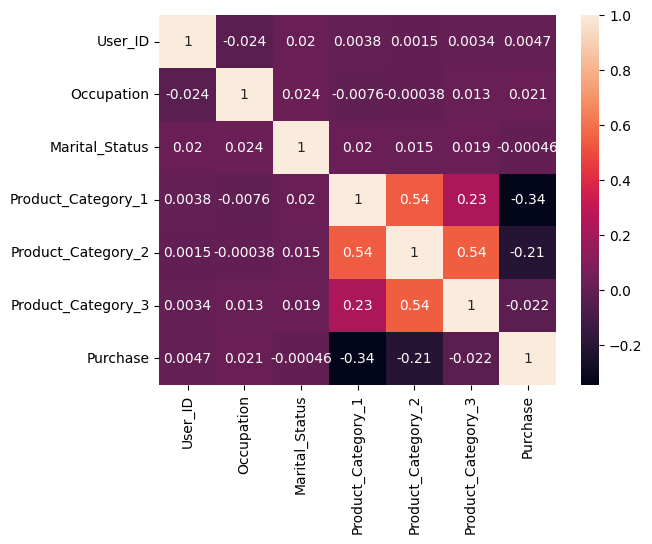

In [5]:
sns.heatmap(black_friday_df.corr(),annot=True)
plt.show()

There is a positive corelation between the product categories

Handling the missing values

In [6]:
black_friday_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Extracting the percentage of missing values

In [7]:
print(black_friday_df.isnull().sum()/black_friday_df.isnull().count())

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64


*As Product_Category_3 have almost 70% of data missing therefore dropping this column*<br>
And since Product_Category_2 have only 30% of missing vlaue and i don't want to replace it with the mean because it can effect the distribution i am replacing the value with 0

In [8]:
black_friday_df.drop("Product_Category_3",axis=1,inplace=True)
black_friday_df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [9]:
black_friday_df["Product_Category_2"] = black_friday_df["Product_Category_2"].fillna(0)
black_friday_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [10]:
black_friday_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,7969


# Data Visualization

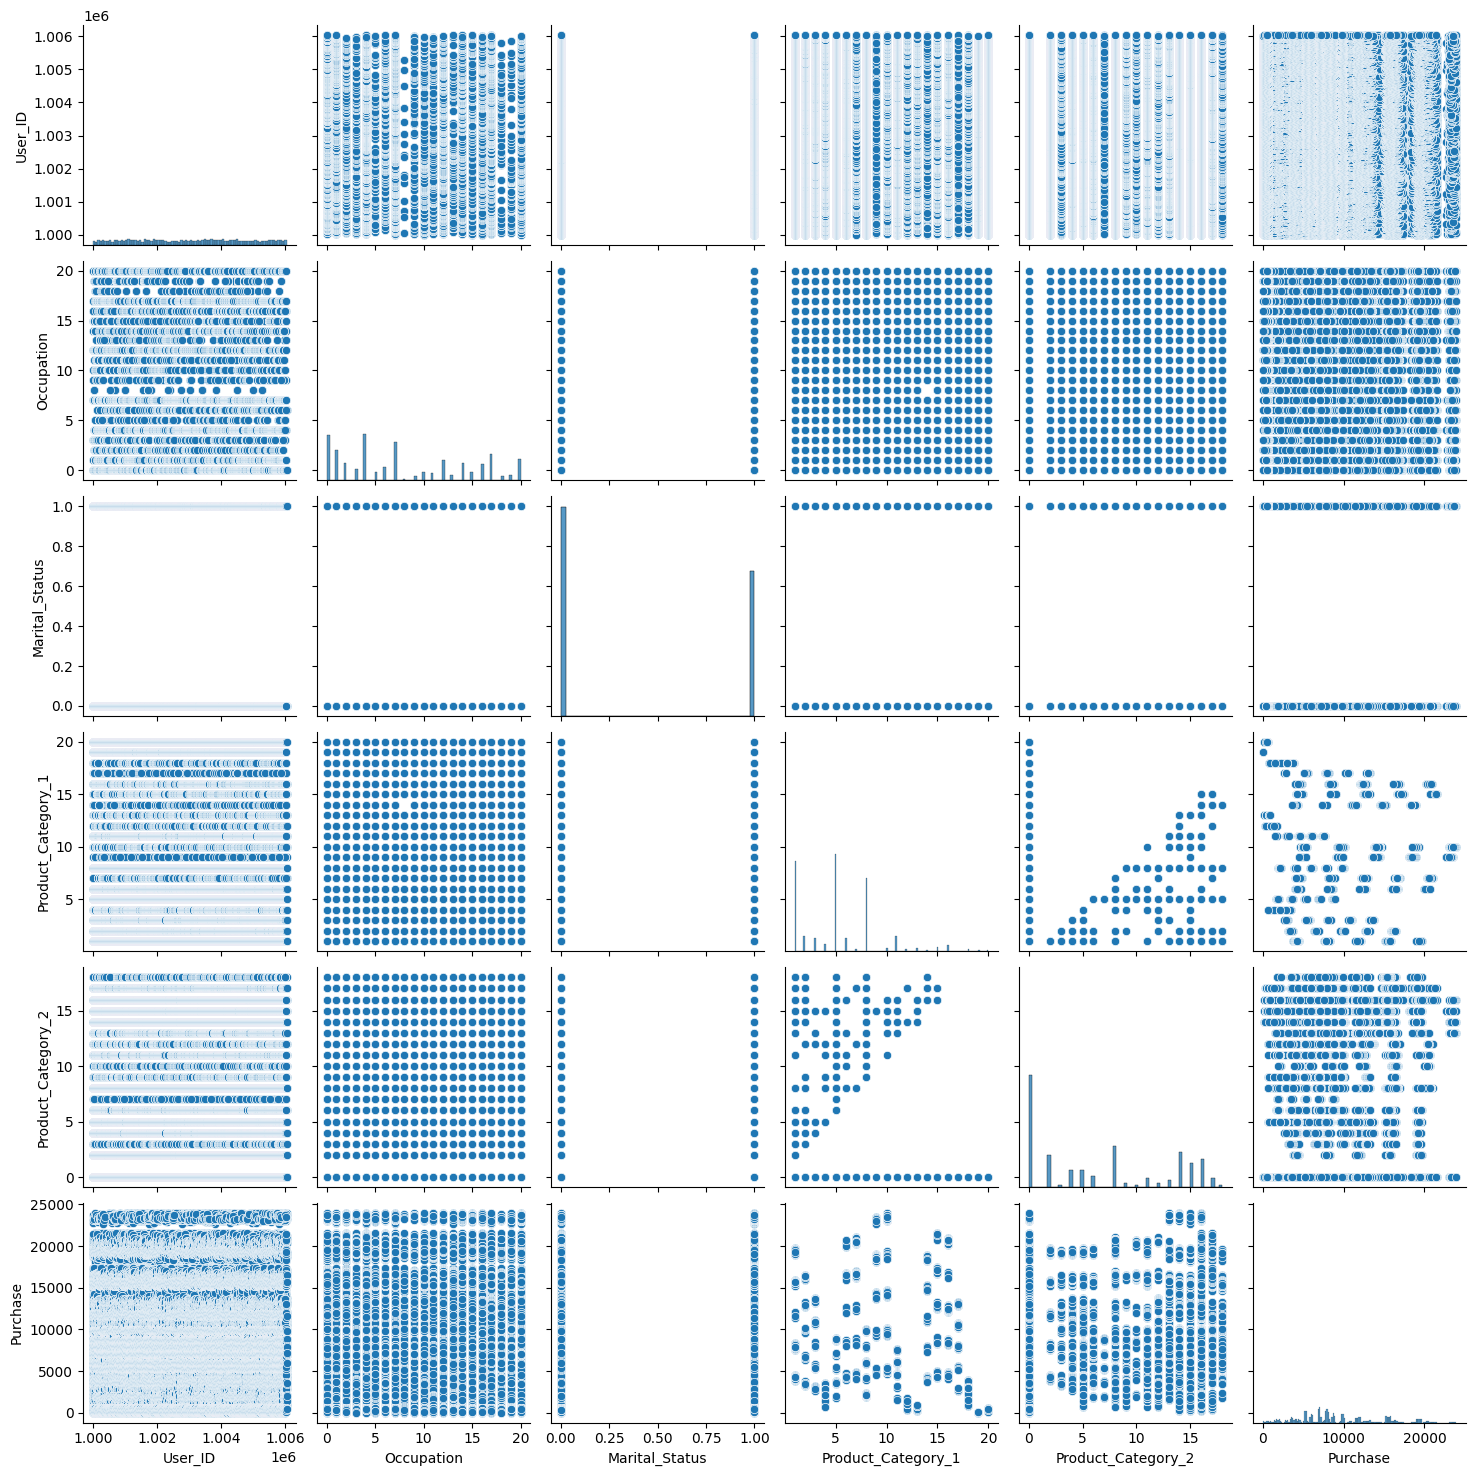

In [11]:
sns.pairplot(black_friday_df)
plt.show()

Product category 2 and product category 1 as some kind of increasing trend

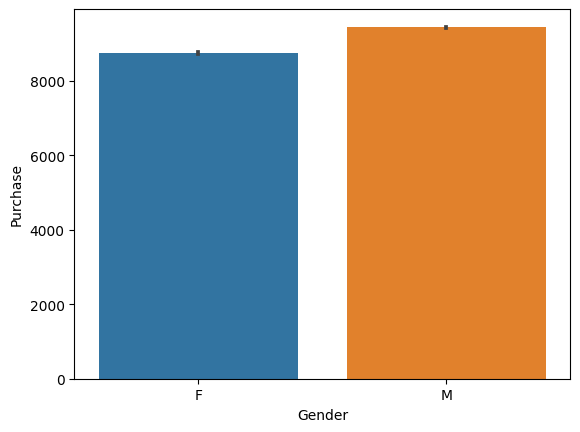

In [12]:
sns.barplot(x="Gender",y = "Purchase",data = black_friday_df)
plt.show()

Males have a higher amount of purchase rate than that of females

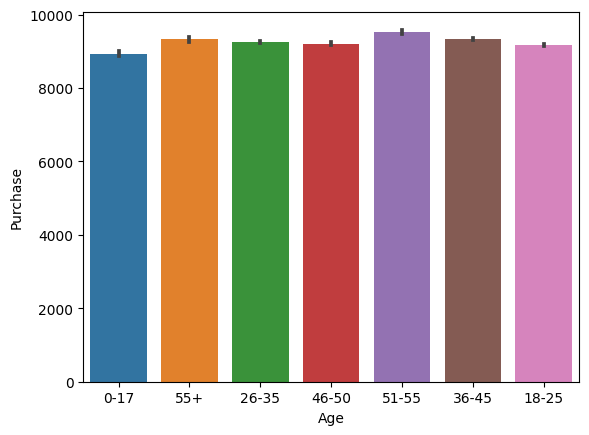

In [13]:
sns.barplot(x="Age",y="Purchase",data=black_friday_df)
plt.show()

Almost all age group have very high purchase rate but the age group 51-55 have maximum out of all

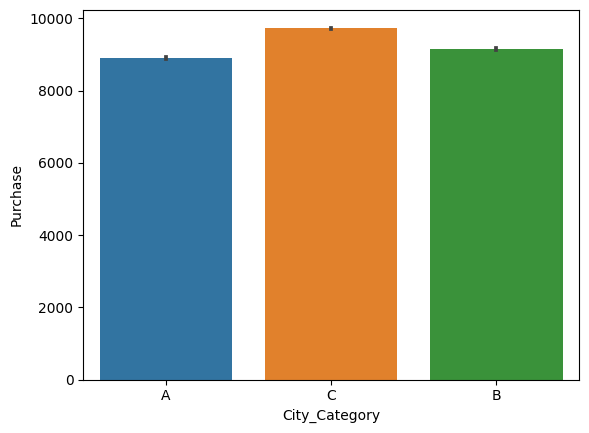

In [14]:
sns.barplot(x="City_Category",y="Purchase",data=black_friday_df)
plt.show()

City Category C have the heighest purchase rate

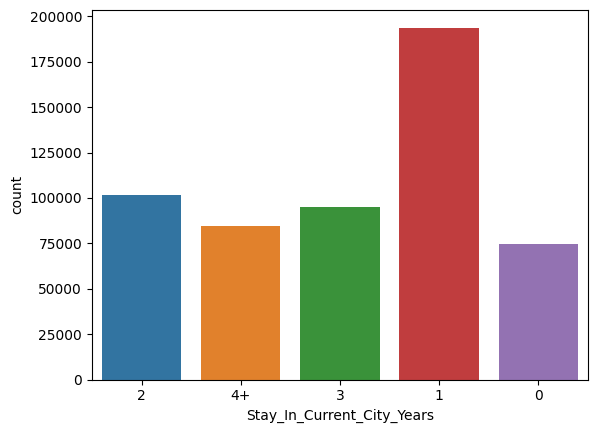

In [15]:
sns.countplot(x = "Stay_In_Current_City_Years",data = black_friday_df)
plt.show()

Prople who recently shifted have maximum purchase

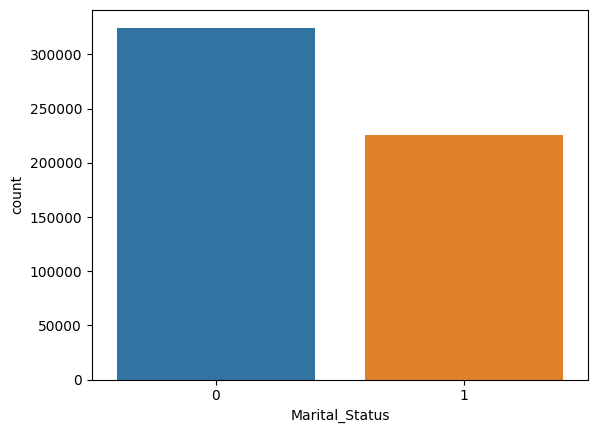

In [16]:
sns.countplot(x="Marital_Status",data=black_friday_df)
plt.show()

In dataset unmarried people have the maximum amount of purchase than that of the married people

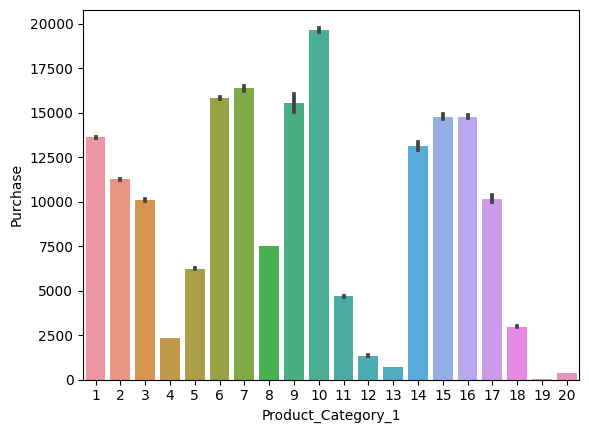

In [17]:
sns.barplot(x="Product_Category_1",y="Purchase",data=black_friday_df)
plt.show()

Currently we have no idea what each product category means but the product categories have decent purchases made out of which product 10 is highest purchased item of all

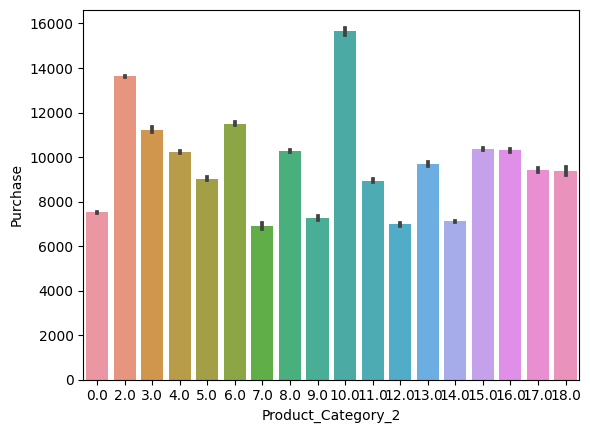

In [18]:
sns.barplot(x= "Product_Category_2",y="Purchase",data= black_friday_df)
plt.show()

The purchase rate for product category 2 is quite nice than that of product cateorgy 1

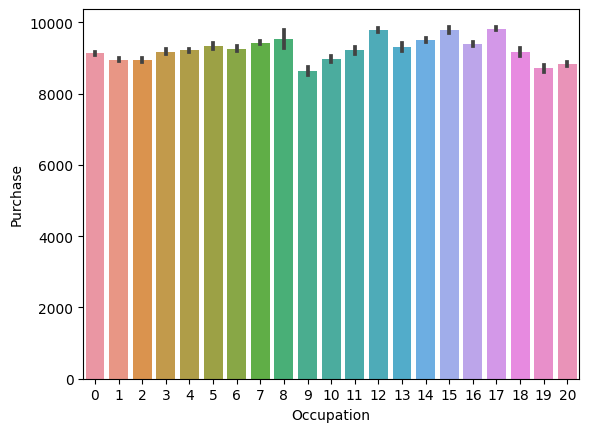

In [19]:
sns.barplot(x="Occupation",y = "Purchase",data= black_friday_df)
plt.show()

The occupation as nothing to do with purchase rate as the purchase is quite high for each and evey occupation

In [20]:
black_friday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [21]:
black_friday_df["Gender"] = black_friday_df["Gender"].map({"F":0,"M":1})
black_friday_df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,7969


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb = LabelEncoder()


Encoding the categorical varibales for now we have three categorical varibale ie <br> 1) Age <br> 2) City_Category <br> 3) Stay_In_Current_City_Years

In [24]:
black_friday_df["Age"]  = lb.fit_transform(black_friday_df["Age"])
black_friday_df["City_Category"] = lb.fit_transform(black_friday_df["City_Category"])
black_friday_df["Stay_In_Current_City_Years"] = lb.fit_transform(black_friday_df["Stay_In_Current_City_Years"])

Dropping the User_ID and the Product_Id as its not useful for the analysis

In [25]:
black_friday_df = black_friday_df.drop(["User_ID","Product_ID"],axis=1)
black_friday_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,0.0,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,0.0,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,0.0,7969


In [26]:
black_friday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 37.8 MB


In [27]:
black_friday_df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

Scaling all the varibales in dataset for a proper analysis <br> Using MINMAXSCALER as i want to remove the outliers for the dataset

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
num_var = ["Age","Occupation","City_Category","Stay_In_Current_City_Years",
           "Product_Category_1","Product_Category_2","Purchase"]
black_friday_df[num_var] = scaler.fit_transform(black_friday_df[num_var])
black_friday_df.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0.0,0.5,0.0,0.5,0,0.105263,0.000000,0.348992
1,0,0.0,0.5,0.0,0.5,0,0.000000,0.333333,0.634181
2,0,0.0,0.5,0.0,0.5,0,0.578947,0.000000,0.058875
3,0,0.0,0.5,0.0,0.5,0,0.578947,0.777778,0.043634
4,1,1.0,0.8,1.0,1.0,0,0.368421,0.000000,0.332248


Preparing for a train test split <br> putting the target varibale which is sales in variale y and rest data into X

In [31]:
y = black_friday_df.pop("Purchase")
X = black_friday_df

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr_model = lr.fit(X_train,y_train)

In [36]:
y_Pred = lr_model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
r_score1 = r2_score(y_test,y_Pred)
print(r_score1)

0.12511222232140706


Linear regression shows only 12% of variance which is not good for the analysis

In [39]:
ms1 = mean_squared_error(y_test,y_Pred)
print(ms1)

0.03844001848345255


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score,r2_score,mean_absolute_error

In [46]:

train_a= []
test_a=[]
#for i in range(1,12):
treemodel = DecisionTreeRegressor()
treemodel.fit(X_train,y_train)
y_train_p = treemodel.predict(X_train)
y_pred_d = treemodel.predict(X_test)
r_scored = r2_score(y_test,y_pred_d)
ms2 = mean_squared_error(y_test,y_pred_d)
train_a.append(r2_score(y_train,y_train_p))
test_a.append(r_scored)
print("Test scores are")
print(r_scored)
print(ms2)
print(treemodel.score(X_test,y_test))
print()
print("Train score are")
print(r2_score(y_train,y_train_p))
print(mean_squared_error(y_train,y_train_p))
print(treemodel.score(X_train,y_train))



Test scores are
0.6027916782651266
0.017452175717648392
0.6027916782651266

Train score are
0.7514727366908971
0.010938619205610319
0.7514727366908971


From The above scores we can observe that Decision tree regressor is overfitting the data as its working fine with training data but drastically dropping for testing data

Using Hyper parameter

In [48]:
for i in range(1,15):
  treemodel1 = DecisionTreeRegressor(max_depth=i)
  treemodel1.fit(X_train,y_train)
  y_train_1 = treemodel1.predict(X_train)
  y_test_1 = treemodel1.predict(X_test)

  print("Train values are")
  print(r2_score(y_train,y_train_1))
  print(mean_squared_error(y_train,y_train_1))
  print()
  print("Test values are")
  print(r2_score(y_test,y_test_1))
  print(mean_squared_error(y_test,y_test_1))
  print("-"*50)



Train values are
0.2701572833073146
0.032123121832151144

Test values are
0.26952241158017864
0.032095055751163275
--------------------------------------------------
Train values are
0.31101604648799386
0.030324774054548222

Test values are
0.3110488712893177
0.030270504169236753
--------------------------------------------------
Train values are
0.44198537960450957
0.024560321320071018

Test values are
0.4418099656721933
0.0245252428760326
--------------------------------------------------
Train values are
0.47597291328759905
0.023064402185296748

Test values are
0.4763470305553449
0.023007784927316952
--------------------------------------------------
Train values are
0.5787302051443519
0.018541667450867265

Test values are
0.5785929488584531
0.018515397343782845
--------------------------------------------------
Train values are
0.6421921253211691
0.015748469756465197

Test values are
0.6433398346971757
0.0156706079297732
--------------------------------------------------
Train valu

# Random Forest Regression



In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
reg = RandomForestRegressor()

In [51]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
y_pred_r = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [53]:
r_score = r2_score(y_test,y_pred_r)
print("Test score is " ,r_score)
print("Train score is ",r2_score(y_train,y_train_pred))

Test score is  0.639535049781812
Train score is  0.7458085810299528


In [54]:
ms3 = mean_squared_error(y_test,y_pred_r)
print("Test mean square error is ",ms3)
print("Train mean square error is ",mean_squared_error(y_train,y_train_pred))

Test mean square error is  0.015837779087267488
Train mean square error is  0.011187919990849768


With mean squared error of 1.59 means that actual error per esitmation is 1.59 of the purchase price.

HyperParameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [56]:
dic = {'n_estimators': [i for i in range(5,105,5)],
    'max_depth': [i for i in range(10,110,10)]}


In [57]:
rsc = RandomizedSearchCV(estimator = reg,param_distributions = dic, cv=3)
rsc.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95, 100]})

In [58]:
rsc.best_params_

{'n_estimators': 85, 'max_depth': 10}

In [59]:
reg1 = RandomForestRegressor(max_depth=10)
reg1.fit(X_train,y_train)
y_reg1_pred = reg1.predict(X_test)
y_train_reg1 = reg1.predict(X_train)
print("Test r2 score is " ,r2_score(y_test,y_reg1_pred))
print("Test mean square erros is " ,mean_squared_error(y_test,y_reg1_pred))
print()
print("Train r2 score is " ,r2_score(y_train,y_train_reg1))
print("Train mean square error is " ,mean_squared_error(y_train,y_train_reg1))


Test r2 score is  0.6526461661403071
Test mean square erros is  0.015261714855925122

Train r2 score is  0.6563137120420461
Train mean square error is  0.015126925634255326


### Conclusion
As seen above <br>
1) Linear Regression give - r2_score - 0.12 mse - 0.0.38<br>
2) Decision Tree give - r2_score - 0.64 mse - 0.0155<br>
3) Random Forest give - r2_score - 0.65 mse - 0.0154

Thus to conclude we got the black friday sales prediction where used linear regression , Decision tree Regressor and random forest regrossor to train the model out of which Random forest Regressor give the atmost solution with an error of 1.59% in each estimation.
<br>
### Recommendation for the comany would be:<BR>
1)Include products which can attract womens as well to increase there purchase sales<br>
2)Add more discounts or offer on product_categories because there is corelation between products if one sale is increased the other will increase as well.<br>
3)Include latest products of ( smartphones and earpods) which will help to attract young generation to the market.<br>
4) Kepp certain exchange offers on the products which were purchased earlier so that people living in that city  for more than 2 years can utilize this offer and purchase new items which will increase the purchase amount.


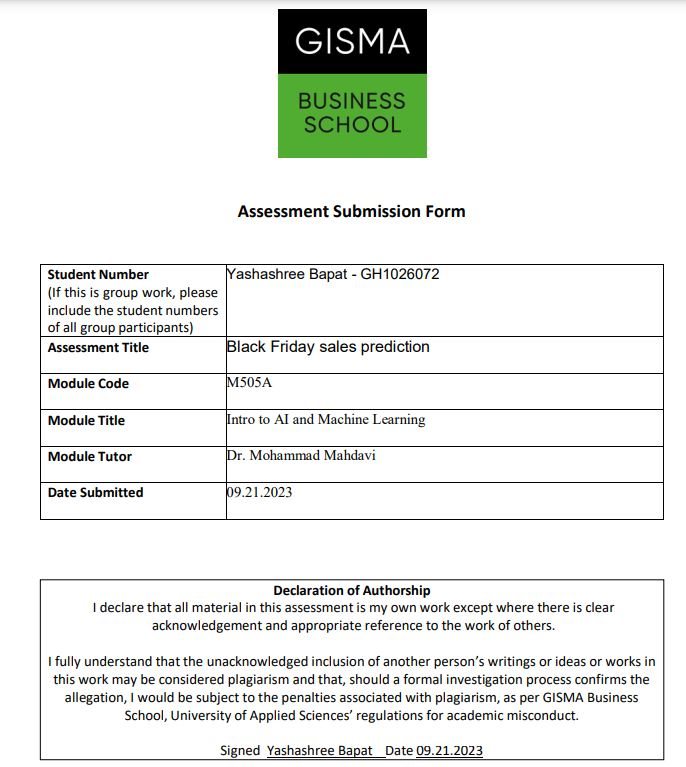

In [ ]:
%%shell
jupyter nbconvert --to html Black_friday.ipynb